In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# some helper funcations for plotting drawing lines
def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected],[s[0][1] for s in rejected], s= 25, color='blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted],[s[0][1] for s in admitted], s= 25, color='red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05, 1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b,color)

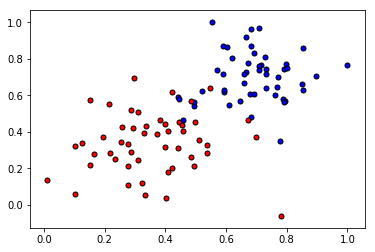

In [27]:
# read and plot the data
data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X, y)
plt.show()

Implementing the basic functions
Here is your turn to shine. Implement the following formulas, as explained in the text.
- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [43]:
# Impliment functions
# activation
def sigmoid(x):
    return 1 /(1 + np.exp(-x))

#Out put
def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

# error fun
def error_formula(y, output):
    return -y *np.log(output) - (1-y) * np.log(1-output)

# update wieght func
def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    d_error = -(y - output)
    weights -= learnrate * d_error * x
    bias -= learnrate * d_error
    return weights, bias

In [44]:
# train func
np.random.seed(44)

epochs = 1000
learning_rate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # printing ut the log-loss error on the train set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs/10) == 0:
            print("\n=============Epoch", e, "=================")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "WARNING Loss increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e %(epochs/100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
    
    # plotting
    plt.title("Solutions")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')
    
    # plotting data
    plot_points(features, targets)
    plt.show()
    
    #plotting error
    plt.title("Error plot")
    plt.xlabel("Numbers of epochs")
    plt.ylabel("Error")
    plt.plot(errors)
    plt.show()
    

            


=============Epoch 0 =================
Train loss:  0.713584519538
Accuracy:  0.4

=============Epoch 100 =================
Train loss:  0.323551100205
Accuracy:  0.94

=============Epoch 200 =================
Train loss:  0.244501453798
Accuracy:  0.94

=============Epoch 300 =================
Train loss:  0.211280089521
Accuracy:  0.93

=============Epoch 400 =================
Train loss:  0.192889937895
Accuracy:  0.93

=============Epoch 500 =================
Train loss:  0.181182688264
Accuracy:  0.91

=============Epoch 600 =================
Train loss:  0.173073063045
Accuracy:  0.92

=============Epoch 700 =================
Train loss:  0.167128524087
Accuracy:  0.92

=============Epoch 800 =================
Train loss:  0.162590614361
Accuracy:  0.92

=============Epoch 900 =================
Train loss:  0.159019096284
Accuracy:  0.92


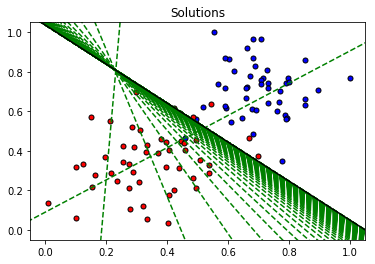

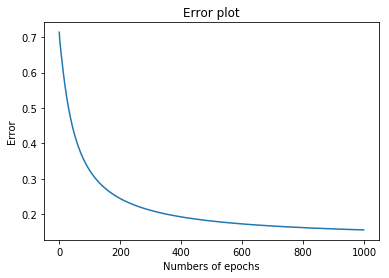

In [45]:
train(X,y,epochs,learning_rate, True)

In [53]:
c = (3*0.4 + 5 * 0.6 -2.2)
b = 1 / (1+np.exp(-(7 * c + 5 * c)))
b

0.99999999996224864